<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Librarys" data-toc-modified-id="Importing-Librarys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Librarys</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Performance-Evaluation" data-toc-modified-id="Performance-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Performance Evaluation</a></span></li><li><span><a href="#Tuning-model-with-Grid-Search" data-toc-modified-id="Tuning-model-with-Grid-Search-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tuning model with Grid Search</a></span></li><li><span><a href="#saving-model" data-toc-modified-id="saving-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>saving model</a></span></li><li><span><a href="#loading-model" data-toc-modified-id="loading-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>loading model</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></div>

### Importing Librarys

In [1]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score
import json

### Loading Data

In [2]:
class Category:
    ELECTRONICS = "ELECTRONICS"
    BOOKS = "BOOKS"
    CLOTHING = "CLOTHING"
    GROCERY = "GROCERY"
    PATIO = "PATIO"
    
class Sentiment:
    POSITIVE = "POSITIVE"
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"

class Review:
    def __init__(self, category, text, score):
        self.category = category
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: # Amazon review is a 4 or 5
            return Sentiment.POSITIVE
        
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
    def get_text(self):
        return [x.text for x in self.reviews]  
    def get_x(self, vectorizer):
        return vectorizer.transform(self.get_text()) 
    def get_y(self):
        return [x.sentiment for x in self.reviews]  
    def get_category(self):
        return [x.category for x in self.reviews]  

In [3]:
file_names = ['Datafiles/Electronics_small.json','Datafiles/Books_small.json','Datafiles/Clothing_small.json',
              'Datafiles/Grocery_small.json','Datafiles/Patio_small.json']
file_categories = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.GROCERY, Category.PATIO]

reviews = []
for i in range(len(file_names)):
    file_name = file_names[i]
    category = file_categories[i]
    with open(file_name) as f:
        for line in f:
            review_json = json.loads(line)
            review = Review(category, review_json['reviewText'], review_json['overall'])
            reviews.append(review)

In [4]:
print(len(reviews))

5000


### Data Preparation

In [5]:
train, test = train_test_split(reviews, test_size = 0.33, random_state=42)

train_container = ReviewContainer(train)
test_container = ReviewContainer(test)
corpus = train_container.get_text()
#Bag of words vectorization
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

train_x = train_container.get_x(vectorizer)
train_y = train_container.get_category()

test_x = test_container.get_x(vectorizer)
test_y = test_container.get_category()

In [8]:
print(len(train))
print(len(test))

3350
1650


In [10]:
from sklearn import svm
clf = svm.SVC(C=16, kernel='linear', gamma='auto')
clf.fit(train_x, train_y)

SVC(C=16, gamma='auto', kernel='linear')

In [12]:
test_set = ['great for my wedding', "loved it in my garden", 'good computer']
new_test = vectorizer.transform(test_set)
clf.predict(new_test)

array(['CLOTHING', 'PATIO', 'ELECTRONICS'], dtype='<U11')

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x.toarray(),train_y)
gnb.score(test_x.toarray(),test_y)

0.8109090909090909

### Performance Evaluation

In [24]:
y_pred = clf.predict(test_x)
f1_score(test_y, y_pred, average=None)

array([0.95111111, 0.89323308, 0.88567294, 0.89891135, 0.91693291])

In [ ]:
for i in range(len(y_pred)):
     print(y_pred[i], test_y[i])

In [22]:
clf.score(test_x, test_y)

0.9090909090909091

### Tuning model with Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1,8,16,32]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x, train_y)
# print best parameter after tuning 
print(clf.best_params_) 

{'C': 1, 'kernel': 'linear'}


In [26]:
clf.score(test_x, test_y)

0.9187878787878788

### saving model

In [27]:
import pickle
with open('Models/category_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f) 
# vectorizer will be used to transform test text data
with open('Models/category_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

### loading model

In [28]:
with open('Models/category_classifier.pkl', 'rb') as f:
    clf = pickle.load(f)
with open('Models/category_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [29]:
test_set = ['very quick speeds', "loved the necklace", 'bad']
new_test = vectorizer.transform(test_set)
clf.predict(new_test)

array(['ELECTRONICS', 'CLOTHING', 'GROCERY'], dtype='<U11')

### Confusion Matrix

<AxesSubplot: >

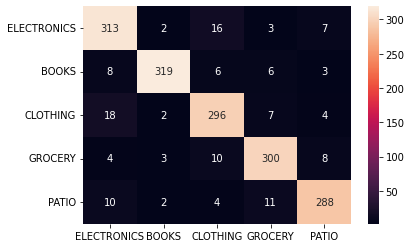

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y_pred = clf.predict(test_x)
labels = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.GROCERY, Category.PATIO]
cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sn.heatmap(df_cm, annot=True, fmt='d')